In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
d=pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')
d

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [60]:
d.drop(['name'], axis=1, inplace=True)

In [61]:
d['orbiting_body'] = d['orbiting_body'].replace('Earth', 1)
d['is_hazardous'] = d['is_hazardous'].astype(int)

In [62]:
d.head(10)

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,19.14,0.394962,0.883161,1,71745.401048,5.814362e+07,0
1,2349507,18.50,0.530341,1.185878,1,109949.757148,5.580105e+07,1
2,2455415,21.45,0.136319,0.304818,1,24865.506798,6.720689e+07,0
3,3132126,20.63,0.198863,0.444672,1,78890.076805,3.039644e+07,0
4,3557844,22.70,0.076658,0.171412,1,56036.519484,6.311863e+07,0
5,3656926,25.00,0.026580,0.059435,1,47477.649832,4.290521e+07,0
6,3421513,21.50,0.133216,0.297879,1,57853.295346,2.727908e+07,1
7,3541504,19.75,0.298233,0.666868,1,46972.486794,6.997593e+07,0
8,3836942,21.70,0.121494,0.271669,1,37424.548382,5.657727e+06,1
9,3892166,23.45,0.054269,0.121350,1,38524.867869,6.166118e+07,0


In [63]:
pd.isna(d).sum()

,0
neo_id,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [64]:
d.dropna(inplace=True)
pd.isna(d).sum()


,0
neo_id,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [66]:
X=d.iloc[:,[0,1,2,3,4,5,6]]
Y=d.iloc[:,7]

In [67]:
X

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance
0,2162117,19.140,0.394962,0.883161,1,71745.401048,5.814362e+07
1,2349507,18.500,0.530341,1.185878,1,109949.757148,5.580105e+07
2,2455415,21.450,0.136319,0.304818,1,24865.506798,6.720689e+07
3,3132126,20.630,0.198863,0.444672,1,78890.076805,3.039644e+07
4,3557844,22.700,0.076658,0.171412,1,56036.519484,6.311863e+07
...,...,...,...,...,...,...,...
338194,54403809,28.580,0.005112,0.011430,1,56646.985988,6.406548e+07
338195,54415298,28.690,0.004859,0.010865,1,21130.768947,2.948883e+07
338196,54454871,21.919,0.109839,0.245607,1,11832.041031,5.346078e+07
338197,54456245,23.887,0.044377,0.099229,1,56198.382733,5.184742e+06


In [68]:
Y


,is_hazardous
0,0
1,1
2,0
3,0
4,0
...,...
338194,0
338195,0
338196,0
338197,0


In [69]:
# Check for imbalance in dataset
class_distribution = d['is_hazardous'].value_counts()
print(class_distribution)
# Calculate the percentage of each class
class_percentage = d['is_hazardous'].value_counts(normalize=True) * 100
print(class_percentage)

is_hazardous
0    295009
1     43162
Name: count, dtype: int64
is_hazardous
0    87.236635
1    12.763365
Name: proportion, dtype: float64


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train,Y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=rf.predict(X_test)
acc=accuracy_score(y_pred,Y_test)
acc

0.9772011532490574

In [73]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[58658,   353],
       [ 1189,  7435]])

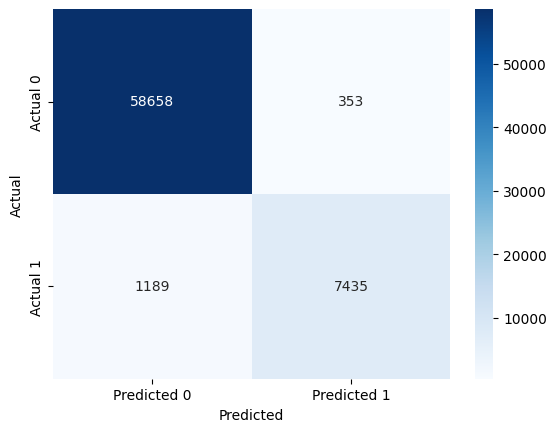

In [74]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [75]:
cr=classification_report(Y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     59011
           1       0.95      0.86      0.91      8624

    accuracy                           0.98     67635
   macro avg       0.97      0.93      0.95     67635
weighted avg       0.98      0.98      0.98     67635

